# ![https://www.fiap.com.br/](https://img.shields.io/badge/FIAP-red.svg?longCache=true&style=for-the-badge) Programando IA com Python
#### Lennon V. Alves Dias . RM 334415

1. Leia o aquivo lemonades.csv usando pandas

In [1]:
import pandas as pd
lemonades = pd.read_csv('lemonades.csv', sep=';')
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price
0,07/01/2016,Park,97,67,70,90.0,0.25
1,07/02/2016,Park,98,67,72,90.0,0.25
2,07/03/2016,Park,110,77,71,104.0,0.25


2. Retorne as informações sobre as colunas e as principais estatísticas sobre o dataset

In [2]:
lemonades.describe()

,Lemon,Orange,Temperature,Leaflets,Price
count,32.000000,32.000000,32.000000,31.000000,32.000000
mean,116.156250,80.000000,78.968750,108.548387,0.354687
std,25.823357,21.863211,4.067847,20.117718,0.113137
min,71.000000,42.000000,70.000000,68.000000,0.250000
25%,98.000000,66.750000,77.000000,90.000000,0.250000
50%,113.500000,76.500000,80.500000,108.000000,0.350000
75%,131.750000,95.000000,82.000000,124.000000,0.500000
max,176.000000,129.000000,84.000000,158.000000,0.500000


3. Realize a limpeza do dataset:
    1. verifique se existe valores nulos
    2. verifique e remova, se existir, linhas duplicadas
    3. trate os elementos faltantes (interpolação (data) e media)

In [3]:
import numpy as np
from datetime import datetime
print(lemonades.isnull().sum())
lemonades.drop_duplicates()
lemonades['Date'] = pd.to_datetime(lemonades['Date'], format="%m/%d/%Y")
tmp = lemonades['Date'].apply(lambda t: (t-datetime(1970,1,1)).total_seconds())
tmp.interpolate(inplace=True)
lemonades['Date'] = pd.to_datetime(tmp, unit='s')
lemonades['Date'] = lemonades['Date'].apply(lambda t: t.date())
lemonades.bfill(inplace=True)
lemonades.head(10)
lemonades['Location'].fillna(method ='ffill', inplace = True)
lemonades['Lemon'].fillna(lemonades['Lemon'].mean(), inplace = True)
lemonades['Orange'].fillna(lemonades['Orange'].mean(), inplace = True)
lemonades['Temperature'].fillna(lemonades['Temperature'].mean(), inplace = True)
lemonades['Leaflets'].fillna(lemonades['Leaflets'].mean(), inplace = True)
lemonades['Price'].fillna(lemonades['Price'].mean(), inplace = True)

Date           1
Location       0
Lemon          0
Orange         0
Temperature    0
Leaflets       1
Price          0
dtype: int64


4. Adicione uma coluna chamada "Sales" que contém o total de vendas de limão e laranja


In [4]:
lemonades['Sales'] = lemonades['Lemon'] + lemonades['Orange']
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales
0,2016-07-01,Park,97,67,70,90.0,0.25,164
1,2016-07-02,Park,98,67,72,90.0,0.25,165
2,2016-07-03,Park,110,77,71,104.0,0.25,187


5. Adicione uma coluna chamada "Revenue" que calcula o lucro (venda*preço)

In [5]:
lemonades['Revenue'] = lemonades['Price'] * lemonades['Sales']
lemonades.head(3)

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sales,Revenue
0,2016-07-01,Park,97,67,70,90.0,0.25,164,41.00
1,2016-07-02,Park,98,67,72,90.0,0.25,165,41.25
2,2016-07-03,Park,110,77,71,104.0,0.25,187,46.75


6. Escreva uma função que retorne o lucro total

In [6]:
def get_total(dataset, field):
    return f'Total: {dataset[field].sum()}'
get_total(lemonades, 'Revenue')

'Total: 2181.0'

7. Escreva uma função que receba dois parâmetros, dataset e temp(int). Se temp for 1, ele retorna a máxima temperatura observada no conjunto de dados; se 0, retorna a média do período observado; se -1, retorna a temperatura mínima.

In [7]:
def my_func(dataset, temp):
    return dataset['Temperature'].max() if temp == 1 else (int(dataset['Temperature'].mean()) if temp == 0 else (dataset['Temperature'].min() if temp == -1 else 'Invalid Temperature'))
temp_max = my_func(lemonades, 1)
temp_mean = my_func(lemonades, 0)
temp_min = my_func(lemonades, -1)
print(f'max: {temp_max}', f'mean: {temp_mean}', f'min: {temp_min}')

max: 84 mean: 78 min: 70


8. Escreva uma função que receba dois parâmetros (dataset, localização) e retorne o dataset com o preço do limão e laranja ajustados em 15% se a localização for 'Park' ou ajustados em 10% se a localização for 'Beach'.

In [8]:
def my_func(dataset, location):
    n_dataset = dataset
    if location == 'Park':
        n_dataset['Price'] = dataset['Price'] * 1.15
    elif location == 'Beach':
        n_dataset['Price'] = dataset['Price'] * 1.1
    return n_dataset
print(my_func(lemonades, 'Other').head(3))
print(my_func(lemonades, 'Beach').head(3))
print(my_func(lemonades, 'Park').head(3))

         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0  2016-07-01     Park     97      67           70      90.0   0.25    164   
1  2016-07-02     Park     98      67           72      90.0   0.25    165   
2  2016-07-03     Park    110      77           71     104.0   0.25    187   

   Revenue  
0    41.00  
1    41.25  
2    46.75  
         Date Location  Lemon  Orange  Temperature  Leaflets  Price  Sales  \
0  2016-07-01     Park     97      67           70      90.0  0.275    164   
1  2016-07-02     Park     98      67           72      90.0  0.275    165   
2  2016-07-03     Park    110      77           71     104.0  0.275    187   

   Revenue  
0    41.00  
1    41.25  
2    46.75  
         Date Location  Lemon  Orange  Temperature  Leaflets    Price  Sales  \
0  2016-07-01     Park     97      67           70      90.0  0.31625    164   
1  2016-07-02     Park     98      67           72      90.0  0.31625    165   
2  2016-07-03     Park    110 

9. Escreva uma função que receba o dataset como parâmetro e retorne o dataset com uma coluna a mais que mostre o rank de temperatura. O dataset retornado precisa estar ordenado de acordo com rank (descendente)

In [9]:
def create_rank(dataset):
    n_dataset = dataset
    n_dataset['Rank'] = n_dataset['Temperature'].rank(ascending=1)
    return n_dataset
print(create_rank(lemonades))

          Date Location  Lemon  Orange  Temperature  Leaflets    Price  Sales  \
0   2016-07-01     Park     97      67           70      90.0  0.31625    164   
1   2016-07-02     Park     98      67           72      90.0  0.31625    165   
2   2016-07-03     Park    110      77           71     104.0  0.31625    187   
3   2016-07-04    Beach    134      99           76      98.0  0.31625    233   
4   2016-07-05    Beach    159     118           78     135.0  0.31625    277   
5   2016-07-06    Beach    103      69           82      90.0  0.31625    172   
6   2016-07-06    Beach    103      69           82      90.0  0.31625    172   
7   2016-07-07    Beach    143     101           81     135.0  0.31625    244   
8   2016-07-08    Beach    123      86           82     113.0  0.31625    209   
9   2016-07-09    Beach    134      95           80     126.0  0.31625    229   
10  2016-07-10    Beach    140      98           82     131.0  0.31625    238   
11  2016-07-11    Beach    1

10. Imprima um gráfico de linha que retorne o lucro ao longo do tempo

Text(0.5, 1.0, 'Revenue over time')

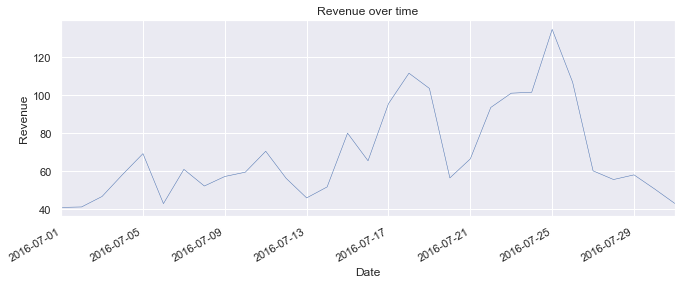

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(rc={'figure.figsize':(11, 4)})

if 'Date' in lemonades:
    lemonades['Date'] = pd.to_datetime(lemonades['Date'])
    lemonades = lemonades.set_index('Date')
lemonade_plot = lemonades['Revenue'].plot(linewidth=0.5);

lemonade_plot.set_ylabel('Revenue')
lemonade_plot.set_title('Revenue over time')

11. Crie um scatter-plot leaflets x sales. Existe alguma correlação entre os dados? (Use a correlação de Pearson e explique o significado do valor obtido por ela)

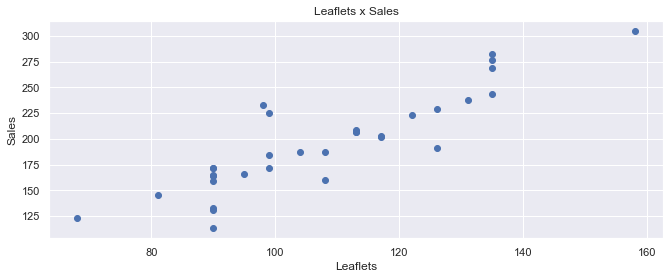

Existe correção forte (0.8857018981042033) entre Leaflets e Sales


In [12]:
plt.scatter(lemonades['Leaflets'], lemonades['Sales'])
plt.title('Leaflets x Sales')
plt.xlabel('Leaflets')
plt.ylabel('Sales')
plt.show()

from scipy import stats
cor_pearson = stats.pearsonr(lemonades['Leaflets'], lemonades['Sales'])
print(f'Existe correção forte ({cor_pearson[0]}) entre Leaflets e Sales')

12. Crie um histograma com 10 bins que mostre o lucro (revenue).

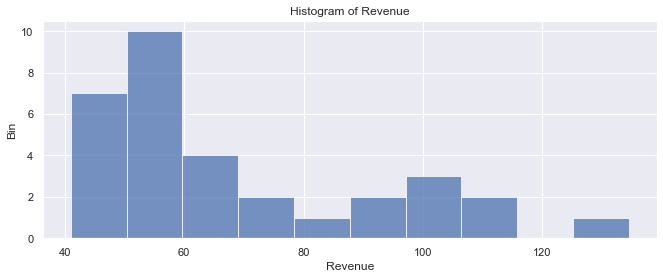

In [13]:
plt.hist(lemonades['Revenue'], bins=10, alpha=0.75)
plt.xlabel('Revenue')
plt.ylabel('Bin')
plt.title(f'Histogram of Revenue')
plt.show()

13. Crie um gráfico de linha que mostre o lucro (Revenue) por tipo de fruta ao longo do tempo.

Text(0.5, 1.0, 'Fruits over time')

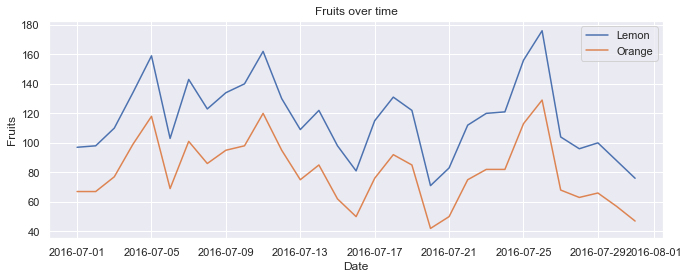

In [14]:
#lemonades.head(5)
fig, ax = plt.subplots()
for fruit in ['Lemon', 'Orange']:
    ax.plot(lemonades[fruit], label=fruit)
ax.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Fruits')
ax.set_title('Fruits over time')

14. Ajuste uma Regressão Linear aos dados para predizer vendas usando cada uma das features abaixo:
    1. Temperature
    2. Leaflets
    3. Price
    4. Retorne um gráfico com a reta ajustada aos dados para cada feature e diga se ela é uma variável boa ou não para predizer vendas.

In [15]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

def show_regression(dataset, x_values, y_values, show_plot = True):
    X = dataset[x_values].values
    y = dataset[y_values].values
    split_test_size = 0.30
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_test_size, random_state=42)
    lr_model = linear_model.LinearRegression()
    lr_model.fit(X_train, y_train.ravel())
    y_pred = lr_model.predict(X_test)
    print(f'MSE: {mean_squared_error(y_test,y_pred)}')
    if show_plot == False: return
    plt.scatter(X_test[:,0], y_test,  color='black')
    plt.plot(X_test[:,0], y_pred, color='red', linewidth=3)
    plt.xlabel(' '.join(x_values))
    plt.ylabel(' '.join(y_values))
    plt.title(f'Linear Regression {" ".join(x_values)} x {" ".join(y_values)}')
    plt.show()

MSE: 1000.2582961134916


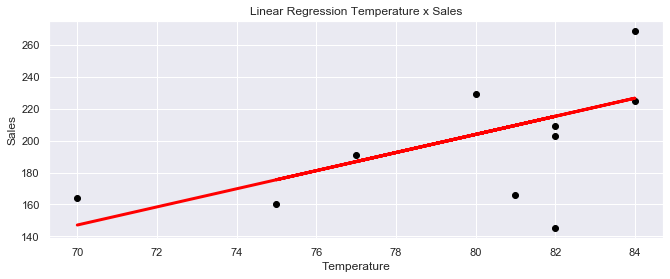

In [16]:
show_regression(lemonades, ['Temperature'], ['Sales'])

MSE: 634.381008770554


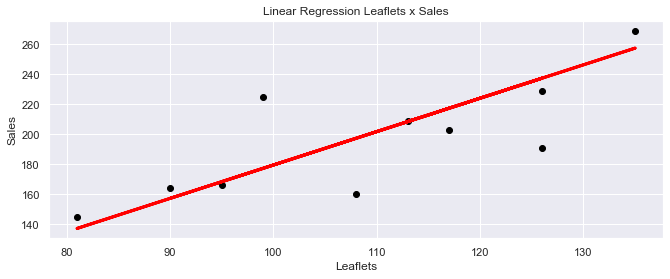

In [17]:
show_regression(lemonades, ['Leaflets'], ['Sales'])

MSE: 1788.0740960215905


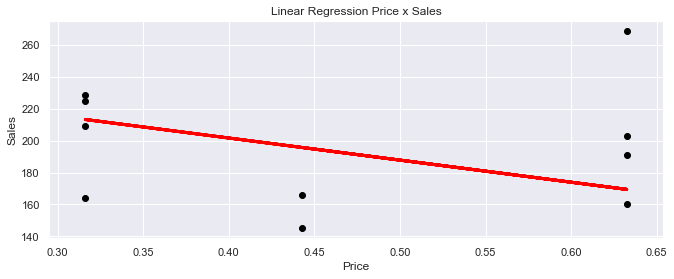

In [18]:
show_regression(lemonades, ['Price'], ['Sales'])

In [19]:
print('Analisando os erros quadráticos (MSE), os valores estão distantes do 0. Isso pode indicar que as variaveis, individualmente, possuem um alto erro ao predizer valores. Sendo assim, identifica-se que não são boas.')

Analisando os erros quadráticos (MSE), os valores estão distantes do 0. Isso pode indicar que as variaveis, individualmente, possuem um alto erro ao predizer valores. Sendo assim, identifica-se que não são boas.


15. Ajuste uma Regressão Linear aos dados para predizer vendas usando as três features juntas. Comente o resultado obtido.

In [20]:
show_regression(lemonades, ['Temperature', 'Leaflets', 'Price'], ['Sales'], False)

MSE: 290.35871124586936


In [21]:
print('Analisando o MSE, com o agrupamento das três features, o erro está mais próximo ao zero. Ainda sendo um valor considerável (podendo ser pela pouca quantidade de dados ou falta de outras features), o resultado está mais próximo de ser identificado como uma boa predição de venda.')

Analisando o MSE, com o agrupamento das três features, o erro está mais próximo ao zero. Ainda sendo um valor considerável (podendo ser pela pouca quantidade de dados ou falta de outras features), o resultado está mais próximo de ser identificado como uma boa predição de venda.


16. Generalize o algoritmo de Regressão Linear implementada em sala para que ele possa ser usado para regressão multivariada.

In [121]:
class LinearRegression():
    
    def cost_function(self,X,y,theta):
        m = len(y) #número de amostras
        J = 0 # custo
        
        X_columns = range(len(X.columns))
        
        for xc in X_columns[1:]:
            for i in range(m):
                J = J + np.power((theta[0] + theta[1] * X[xc][i] - y[i]),2)
        
        return J*(1/(2*m))
    
    def gradient_descent(self,X,y,theta,alpha,num_iter):
        m = len(y)
        J_history = np.zeros(num_iter)
        temp0 = 0
        temp1 = 0
        
        X_columns = range(len(X.columns))
        
        for xc in X_columns[1:]:
            for k in range(num_iter):        
                for i in range(m):
                    temp0 = temp0 - alpha * (1/m * (theta[0] + theta[1] * X[xc][i] - y[i]))
                    temp1 = temp1 - alpha * (1/m * (theta[0] + theta[1] * X[xc][i] - y[i]))*X[xc][i]
                    theta[0] = temp0
                    theta[1] = temp1

                J_history[k] = self.cost_function(X,y,theta)
    
        return theta,J_history

17. Aplique o algoritmo implementado na questão 16 no conjunto de dados consumo_cerveja.csv usando as mesmas features para treinamento.
    1. Compare os resultados que você obteve com os resultados obtidos através da Scikit Learning.
    2. Prediga o consumo usando seu modelo e o modelo da sklearn.
    3. Calcule o MSE de ambos

In [122]:
beer = pd.read_csv('./consumo_cerveja.csv', sep=';')
beer.head(3)

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,01/01/2015,27.30,23.9,32.5,0.0,0,25.461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28.972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30.814


In [123]:
x = beer.iloc[0:,4:6]
ones = np.ones(len(beer))
x.insert(0, len(x.columns) + 1, ones)
y = beer.iloc[:,6]
theta = np.zeros(len(x.columns))
x.columns = range(x.shape[1])
iterations = 1500
alpha = 0.01

In [124]:
lr = LinearRegression()

In [125]:
custo = lr.cost_function(x,y,theta)
custo

664.5288878273968

In [126]:
theta_lr, custo_h = lr.gradient_descent(x,y,theta,alpha,iterations)
theta_lr

array([24.10728588,  4.61414272,  0.        ])

MSE: 6.7237231503018435


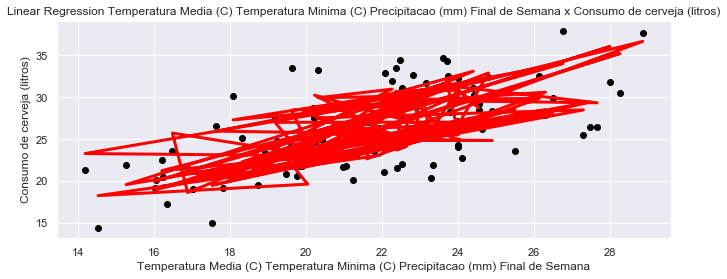

In [39]:
show_regression(beer, ['Temperatura Media (C)', 'Temperatura Minima (C)', 'Precipitacao (mm)', 'Final de Semana'], ['Consumo de cerveja (litros)'])